In [17]:
from warnings import filterwarnings

filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from quant_invest_lab.backtest import  price_long_only_backtester, price_short_only_backtester

from crypto_momentum_portfolios.data_loader import CryptoDataLoader
from crypto_momentum_portfolios.indicators import Indicators

dl = CryptoDataLoader()
dl.assets

['bitcoin',
 'ethereum',
 'bitcoin_cash',
 'ripple',
 'litecoin',
 'tron',
 'ethereum_classic',
 'chainlink',
 'stellar',
 'cardano',
 'dash',
 'tezos',
 'binancecoin',
 'solana',
 'matic_network',
 'dogecoin',
 'avalanche_2']

In [18]:
SYMBOL = "litecoin"

df = dl.get_crypto([SYMBOL])

In [19]:
df.loc[:, "MoM"] = Indicators.momentum(df)

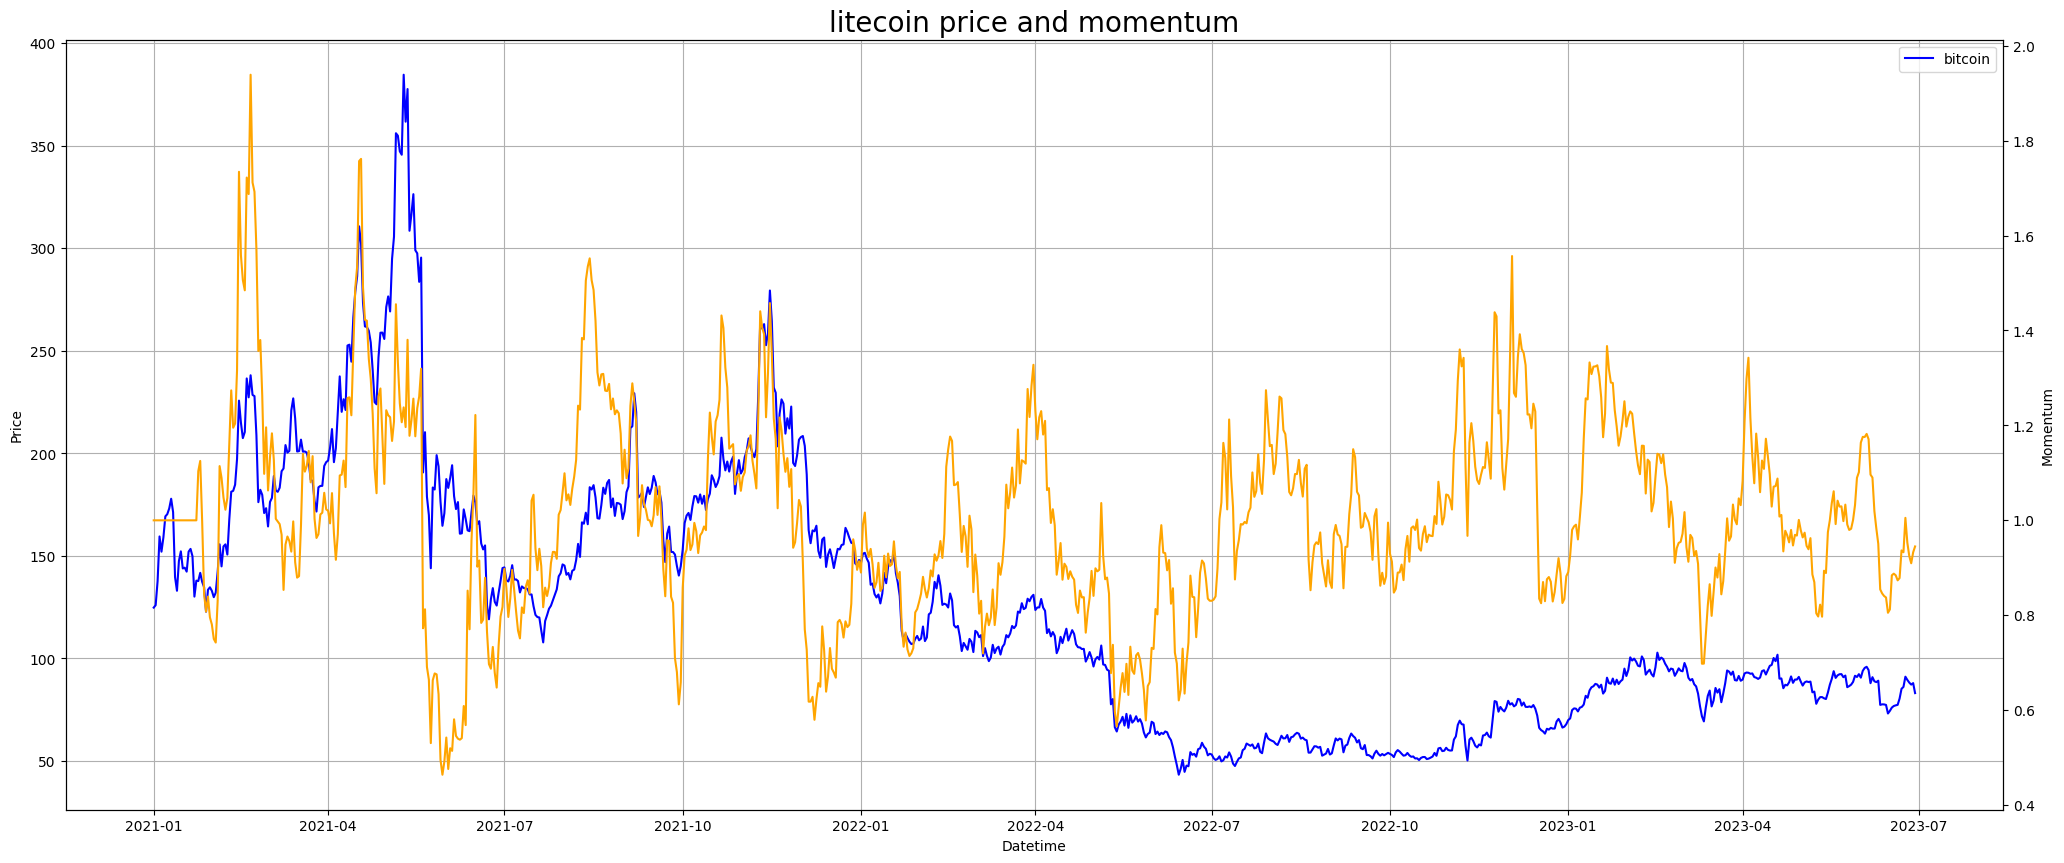

In [20]:
f, ax = plt.subplots(1, 1, figsize=(25, 10))
ax.plot(df[SYMBOL], label="bitcoin", color="blue")
ax_l = ax.twinx()
ax_l.plot(df.MoM, label="MoM", color="orange")
ax.set_title(f"{SYMBOL} price and momentum", fontsize=20)
ax.set_ylabel("Price")
ax_l.set_ylabel("Momentum")
ax.set_xlabel("Datetime")
ax.legend()
ax.grid()

# Long Only

In [21]:

def long_entry_function(row: pd.Series, prev_row: pd.Series) -> bool:
    return True if row.MoM >= 1 else False

def long_exit_function(row: pd.Series, prev_row: pd.Series, trading_days: int) -> bool:
    return True if row.MoM < 1 else False

# Backtest your strategy
price_long_only_backtester(
    df=df,
    price_column=SYMBOL,
    long_entry_function=long_entry_function,
    long_exit_function=long_exit_function,
    timeframe="1day",
    initial_equity=1000,
)

Backtesting...:  21%|██        | 189/909 [00:00<00:00, 913.86it/s]

-------------  Initial informations  -------------
Period: [2021-01-01 00:00:00] -> [2023-06-29 00:00:00]
Intial balance: 1000.00 $
Taker fees: 0.10 %, Maker fees: 0.10 %, All the metrics will be calculated considering these fees
Long only position

------------  Strategy performances  -------------
Strategy final net balance: 1377.51 $, return: 37.75 %
Buy & Hold final net balance: 665.80 $, returns: -33.42 %
Strategy winrate ratio: 48.78 %
Strategy payoff ratio: 1.91
Strategy profit factor ratio: 1.82
Strategy expectancy: 42.07 %

-------  Returns statistical information  --------
Expected return annualized: 41.23 % vs 31.26 % (buy and hold)
CAGR: 13.71 % vs -15.05 % (buy and hold)
Expected volatility annualized: 74.27 % vs 96.53 % (buy and hold)
Specific volatility (diversifiable) annualized: 47.36 %
Systematic volatility annualized: 57.21 %
Skewness: -0.67 vs -0.36 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 12.55 vs -0.36 (buy and hold) , >3 = fat tails, <3 = thin ta

# Short Only

In [22]:

def short_entry_function(row: pd.Series, prev_row: pd.Series) -> bool:
    return True if row.MoM < 1 else False

def short_exit_function(row: pd.Series, prev_row: pd.Series, trading_days: int) -> bool:
    return True if row.MoM >= 1 else False

# Backtest your strategy
price_short_only_backtester(
    df=df,
    price_column=SYMBOL,
    short_entry_function=short_entry_function,
    short_exit_function=short_exit_function,
    timeframe="1day",
    initial_equity=1000,
)

Backtesting...:  11%|█         | 96/909 [00:00<00:00, 909.73it/s]

-------------  Initial informations  -------------
Period: [2021-01-01 00:00:00] -> [2023-06-29 00:00:00]
Intial balance: 1000.00 $
Taker fees: 0.10 %, Maker fees: 0.10 %, All the metrics will be calculated considering these fees
Short only positions

------------  Strategy performances  -------------
Strategy final net balance: 1572.92 $, return: 57.29 %
Buy & Hold final net balance: 665.80 $, returns: -33.42 %
Strategy winrate ratio: 46.34 %
Strategy payoff ratio: 2.27
Strategy profit factor ratio: 1.96
Strategy expectancy: 51.37 %

-------  Returns statistical information  --------
Expected return annualized: 45.44 % vs 31.26 % (buy and hold)
CAGR: 19.92 % vs -15.05 % (buy and hold)
Expected volatility annualized: 74.40 % vs 96.53 % (buy and hold)
Specific volatility (diversifiable) annualized: 47.17 %
Systematic volatility annualized: 57.53 %
Skewness: 0.92 vs -0.36 (buy and hold), <0 = left tail, >0 = right tail
Kurtosis: 13.44 vs -0.36 (buy and hold) , >3 = fat tails, <3 = thin t